In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install kagglehub

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amanalisiddiqui/fraud-detection-dataset")

print("Path to dataset files:", path)

100%|██████████| 178M/178M [00:02<00:00, 76.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amanalisiddiqui/fraud-detection-dataset/versions/1


In [5]:
import os
print("Files in dataset folder:", os.listdir(path))

Files in dataset folder: ['AIML Dataset.csv']


In [6]:
csv_file = os.path.join(path, "AIML Dataset.csv")

In [7]:
db = pd.read_csv(csv_file)

In [8]:
db.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [10]:
df = db
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


EDA - Part 1

1. Genral Information About Data Types & Memory usage side of data frame

In [11]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


2. Check Columns ame

In [12]:
db.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

3. See Count of Fraud and not Fraud

In [13]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


4. See Counnt of how many get Flaged as Fraud

In [14]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


5. Check Have Null, CellWise, ColumWise, GenralTotal

In [15]:
df.isnull(),db.isnull().sum(),db.isnull().sum().sum()

(          step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
 0        False  False   False     False          False           False   
 1        False  False   False     False          False           False   
 2        False  False   False     False          False           False   
 3        False  False   False     False          False           False   
 4        False  False   False     False          False           False   
 ...        ...    ...     ...       ...            ...             ...   
 6362615  False  False   False     False          False           False   
 6362616  False  False   False     False          False           False   
 6362617  False  False   False     False          False           False   
 6362618  False  False   False     False          False           False   
 6362619  False  False   False     False          False           False   
 
          nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
 0           False  

6. Check Shape of Data Set

In [16]:
df.shape

(6362620, 11)

7. Find Percetage of Fraud Data

In [17]:
df['isFraud'].value_counts()

,count
isFraud,
0,6354407
1,8213


In [18]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

8. Class Innbalncne?

EDA - Part 2

1. Visualize Transactionn Types

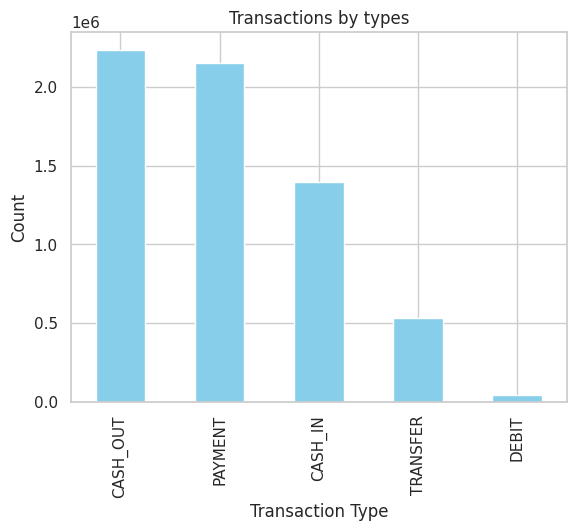

In [19]:
df['type'].value_counts().plot(
  kind = 'bar',
  title='Transactions by types',
  color = 'skyblue'
)
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

2. Fraud Rates By Types

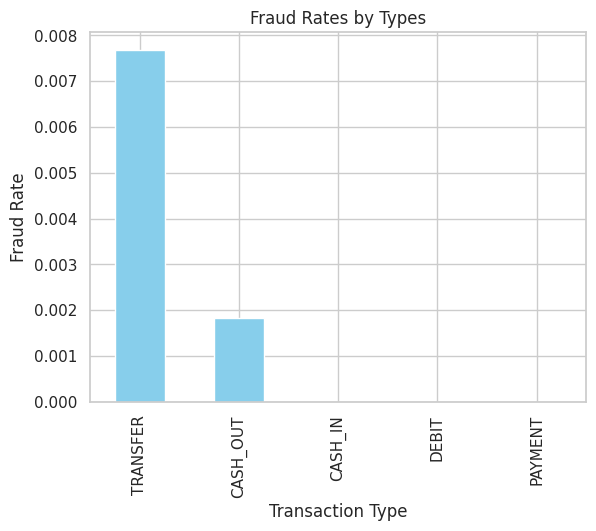

In [20]:
fraud_types = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraud_types.plot(kind='bar', title='Fraud Rates by Types', color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

3. Amount Statistics

In [21]:
df['amount'].describe().astype(int)

,amount
count,6362620
mean,179861
std,603858
min,0
25%,13389
50%,74871
75%,208721
max,92445516


4. Histogram - Log Transformation for Smoth Histogram

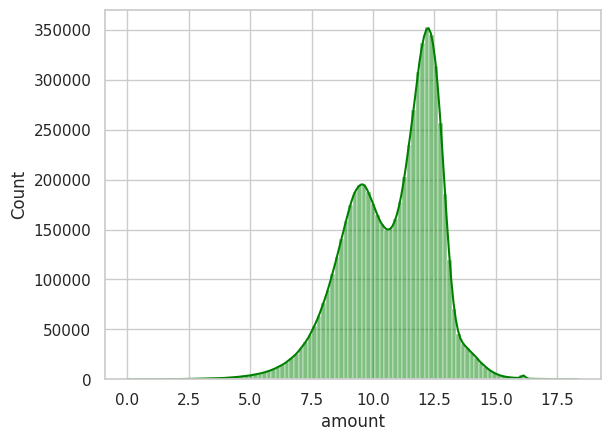

In [22]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=True,color = 'green')
plt.show()

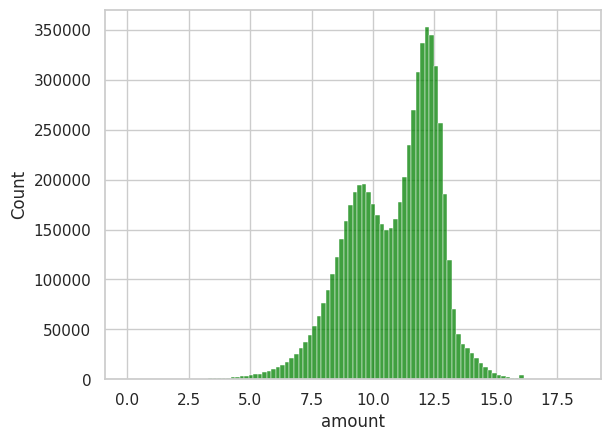

In [23]:
sns.histplot(np.log1p(df['amount']),bins=100,kde=False,color = 'green')
plt.show()

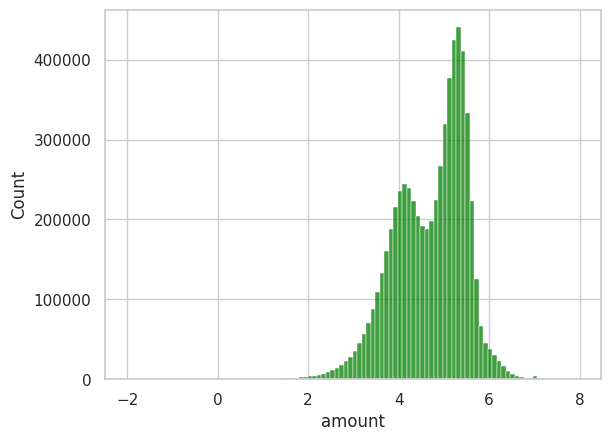

In [24]:
sns.histplot(np.log10(df['amount']),bins=100,kde=False,color = 'green')
plt.show()

5. Relationship of Fraud & Amount

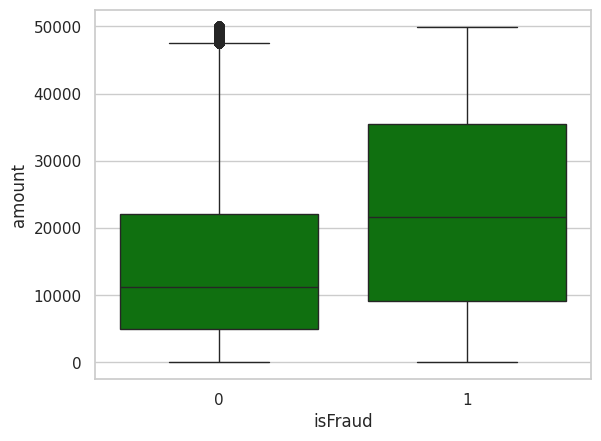

In [25]:
sns.boxplot(df[df['amount']<50000],x='isFraud',y='amount',color='green')
plt.show()

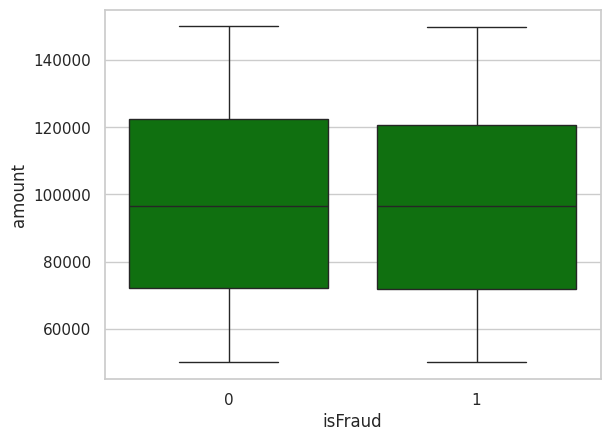

In [26]:
sns.boxplot(df[(df['amount']>50000) & (df['amount']<150000)],x='isFraud',y='amount',color='green')
plt.show()

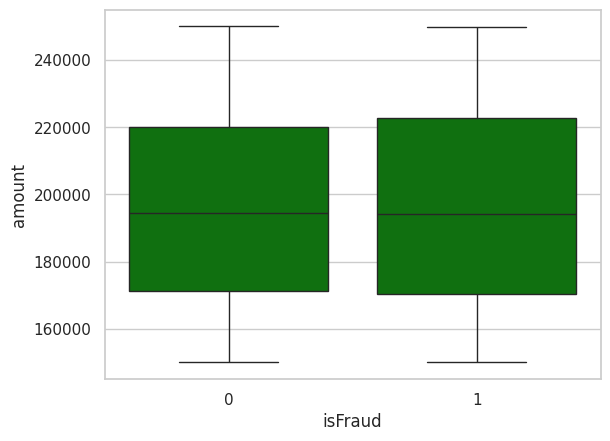

In [27]:
sns.boxplot(df[(df['amount']>150000) & (df['amount']<250000)],x='isFraud',y='amount',color='green')
plt.show()

6. Balance Chains & Anomalies

In [28]:
df['balanceDiffOrg'] = df['oldbalanceOrg']-df['newbalanceOrig']
df['balanceDiffDest'] = df['oldbalanceDest']-df['newbalanceDest']


In [29]:
(df['balanceDiffOrg']<0).sum()

np.int64(1399253)

In [30]:
(df['balanceDiffDest']<0).sum()

np.int64(2806464)

7. Steps. SHow Plot annd delete it

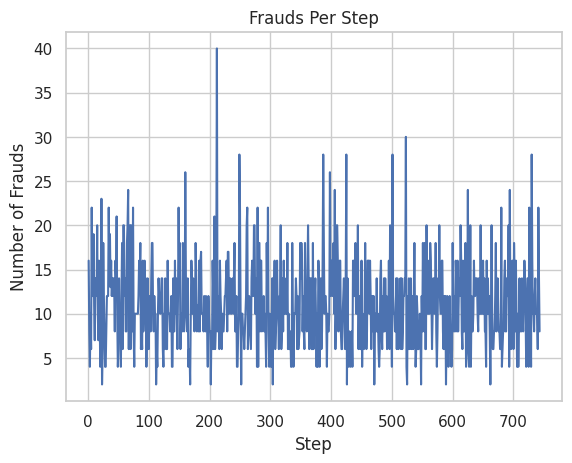

In [31]:
frauds_per_step = df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values)
plt.title('Frauds Per Step')
plt.xlabel('Step')
plt.ylabel('Number of Frauds')
plt.show()

In [32]:
df.drop(columns = 'step' , inplace=True)

8. By Customers Fraud. High No of senders and High no of recivers

In [33]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
C1462946854,3
C1065307291,3
C1999539787,3
C2098525306,3


In [34]:
top_recivers = df['nameDest'].value_counts().head(10)
top_recivers

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


9. See Fraud Making Customers

In [35]:
fraud_user = df[df['isFraud']==1]['nameOrig'].value_counts().head(10)
fraud_user

,count
nameOrig,
C1280323807,1
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C1039979813,1
C2089752665,1
C1614818636,1
C40604503,1


10. Analyze Types

In [36]:
fraud_types = df[df['type'].isin(['TRANSFER','CASH_OUT'])]
fraud_types['type'].value_counts()

,count
type,
CASH_OUT,2237500
TRANSFER,532909


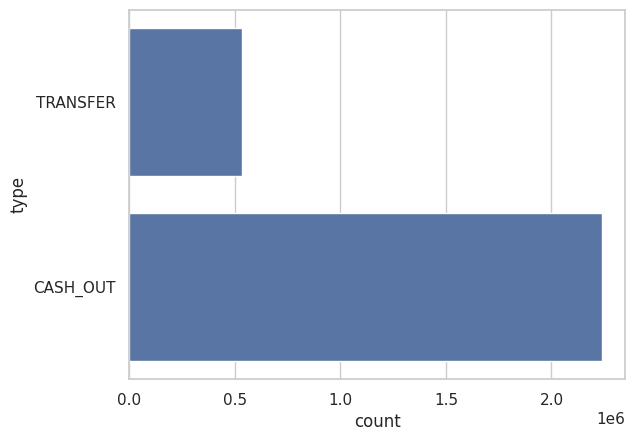

In [37]:
sns.countplot(fraud_types['type'])
plt.show()

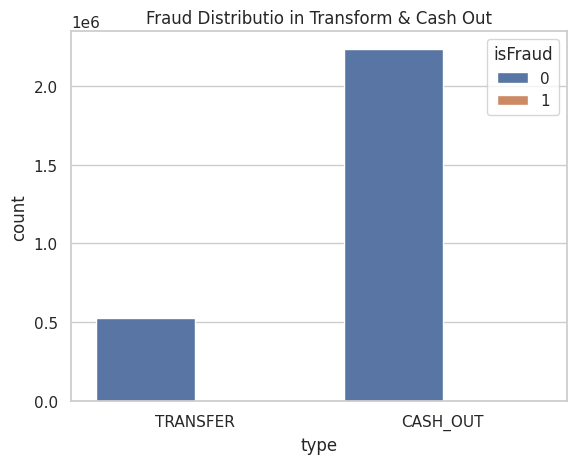

In [38]:
sns.countplot(fraud_types,x='type',hue='isFraud')
plt.title('Fraud Distributio in Transform & Cash Out')
plt.show()

In [39]:
fraud_types.groupby('isFraud')['type'].value_counts()

isFraud  type    
0        CASH_OUT    2233384
         TRANSFER     528812
1        CASH_OUT       4116
         TRANSFER       4097
Name: count, dtype: int64

In [40]:
fraud_types.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_OUT  0          2233384
          1             4116
TRANSFER  0           528812
          1             4097
Name: count, dtype: int64

11. Correlation

In [41]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrg', 'balanceDiffDest'],
      dtype='object')

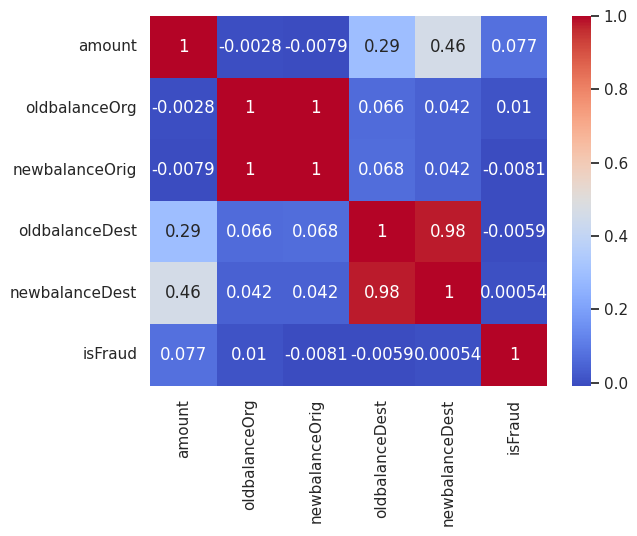

In [42]:
corr = (df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']]).corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

12. Filter Customers After Transform they got zero

In [43]:
zero_after_trasform = df[(df['newbalanceOrig']==0) & (df['oldbalanceOrg']>0) & (df['type'].isin(['TRANSFER','CASH_OUT']))]
zero_after_trasform['isFraud'].value_counts()

,count
isFraud,
0,1180062
1,8012


Feature Engineering

1. Imports
a. sklearn - Preprocessor
b. model_selection - train_test_split
c. composer  - StandardScaler
d. composer  - OneHotEncoder
e. pipeline - Pipeline
f. metrics - comparision_reports, confusion_metrics
g. models - LogisticRegressor
    

In [44]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

2. Drop Columns

In [48]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balanceDiffOrg', 'balanceDiffDest'],
      dtype='object')

In [49]:
data_models = df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],axis =1)

2.5 Set Categorical and Numerical

In [70]:
numerical = ["amount","oldbalanceDest","newbalanceDest","oldbalanceOrg","newbalanceOrig"]
categorical = ["type"]

3. Target

In [71]:
y= data_models['isFraud']
X= data_models.drop('isFraud',axis=1)

4. Train Test Split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y)

5. Preprocessor

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
    ("num",StandardScaler(),numerical),
    ("cat",OneHotEncoder(drop='first'),categorical),

], remainder = 'drop'
)

6. Pipeline

In [74]:
pipeline = Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight='balanced',max_iter=1000))
])

6. Train Pipeline

In [75]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

7. Predict

In [78]:
y_pred = pipeline.predict(X_test)

8. ClasficationnReport & cofusion metrics

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [82]:
confusion_matrix(y_test,y_pred)

array([[1804549,  101773],
       [    155,    2309]])

In [83]:
confusion_matrix(y_pred,y_test)

array([[1804549,     155],
       [ 101773,    2309]])

9. Score

In [85]:
pipeline.score(X_test,y_test)

0.9466006142123842

10. Export Pipeline

In [86]:
import joblib
joblib.dump(pipeline,'pipeline.pkl')

['pipeline.pkl']

In [87]:
pip freeze > requirements.txt


In [88]:
pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.1.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.1.5.0.43.43
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.31.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.4
catalogue==2.0.10
certifi==2026.1.4
cf